# Suppor Vector Machines


**Model**:  
$$
\hat{y}_i(w, w_0) = w^T x_i + w_0, \quad f(x_i; w, w_0) = \text{sign}(\hat{y}_i(w, w_0))
$$

**Loss**:  
$$
\mathcal{L}(y, \hat{y}(w, w_0)) = \max(0, 1 - y_i (w^T x_i + w_0))
$$

**Regularization**:  
$$
\Omega(w) = \lambda w^T w = \lambda \sum_{m=1}^M w_m^2
$$

**Optimization Objective**:  
$$
\arg \min_{w, w_0} \sum_{i=1}^N \mathcal{L}(y_i, w^T x_i + w_0) + \lambda \sum_{m=1}^M w_m^2
$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_classification

In [3]:
# Generate a binary classification dataset
X, y = make_classification(
    n_samples=100,
    n_features=2,  # Total number of features
    n_informative=2,  # Number of informative features
    n_redundant=0,  # Number of redundant features
    n_repeated=0,  # Number of repeated features
    n_classes=2,  # Binary classification
    n_clusters_per_class=1,
    class_sep=0.5,
    random_state=42)
X_full = np.linspace(-1.5, 2.5, 1000)


# Convert lables from {0, 1} to {-1, 1}
y = np.where(y == 0, -1, 1)
print(f'Shape of X: {X.shape}')
print(f'Shape of y: {y.shape}')

Shape of X: (100, 2)
Shape of y: (100,)


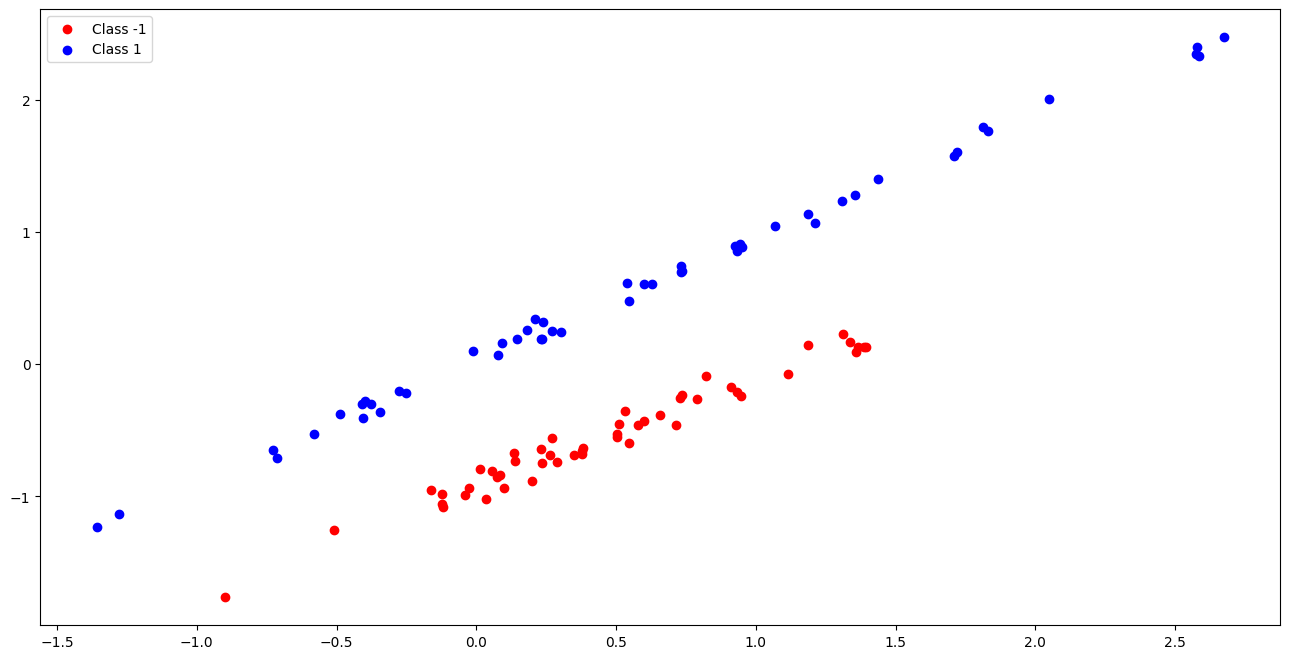

In [4]:
plt.figure(figsize=(16, 8))
# Scatter plot for class -1
plt.scatter(X[y==-1, 0], X[y==-1, 1], color='red', label='Class -1')
# Scatter plot for class 1
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', label='Class 1')
plt.legend()
plt.show()

In [5]:
class LinearSVM:
    def __init__(self, n_features: int) -> None:
        self.w = np.random.rand(n_features)
        self.b = np.random.rand(1)
    
    def fit(self,
            X: np.ndarray,
            y: np.ndarray,
            lr: float=0.01,
            alpha: float=0.1,
            epochs: int=100) -> None:
        for epoch in range(epochs):
            for i in range(X.shape[0]):
                z = np.dot(self.w.T, X[i]) + self.b
                if y[i]*z < 1: # Margin condition
                    dw = -y[i] * X[i] + 2 * alpha * np.sum(self.w)
                    db = -y[i]
                else:
                    dw = 2 * alpha * np.sum(self.w)
                    db = 0
                
                # Update parameters 
                self.w = self.w - lr * dw
                self.b = self.b - lr * db
            
            if epoch % 10 == 0:
                hinge_loss = np.mean(np.maximum(0, 1-y*(np.dot(X, self.w) + self.b)))
                print(f'Epoch: {epoch}\tHinge-Loss: {hinge_loss:.4f}')


In [6]:
svm = LinearSVM(2)
svm.fit(X, y)

Epoch: 0	Hinge-Loss: 0.8543
Epoch: 10	Hinge-Loss: 0.0598
Epoch: 20	Hinge-Loss: 0.0078
Epoch: 30	Hinge-Loss: 0.0040
Epoch: 40	Hinge-Loss: 0.0024
Epoch: 50	Hinge-Loss: 0.0024
Epoch: 60	Hinge-Loss: 0.0024
Epoch: 70	Hinge-Loss: 0.0032
Epoch: 80	Hinge-Loss: 0.0027
Epoch: 90	Hinge-Loss: 0.0028


In [7]:
from perceptron import Perceptron

# Fit also a perceptron
perc = Perceptron(2)
perc.fit(X, y)

In [8]:
# Extract hyperplane parameters

# For svm
w1, w2 = svm.w
b = svm.b[0]

slope_svm = -w1 / w2
intersect_svm = -b / w2

# For perceptron
w1, w2 = perc.w
b = perc.b

slope_perc = -w1 / w2
intersect_perc = -b / w2

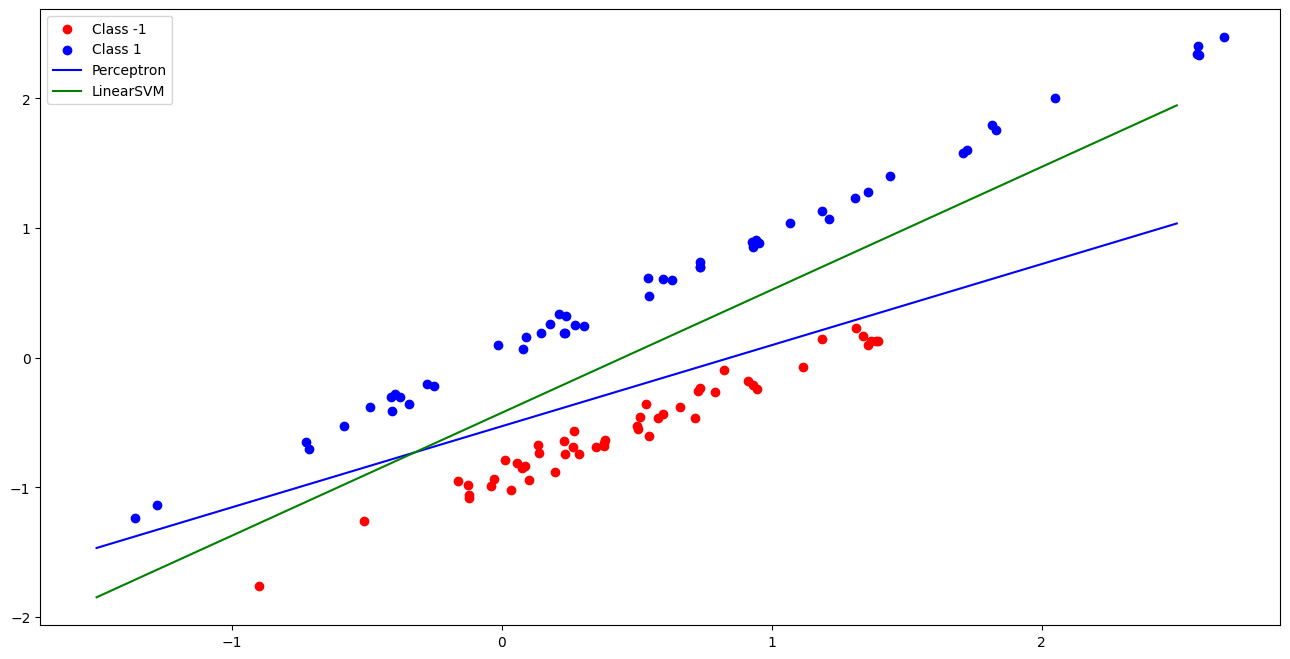

In [9]:
plt.figure(figsize=(16, 8))

# Scatter plot for class -1
plt.scatter(X[y==-1, 0], X[y==-1, 1], color='red', label='Class -1')
# Scatter plot for class 1
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', label='Class 1')

plt.plot(X_full, slope_perc*X_full + intersect_perc, label='Perceptron', color='blue')
plt.plot(X_full, slope_svm*X_full + intersect_svm, label='LinearSVM', color='green')

plt.legend()
plt.show()